In [9]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

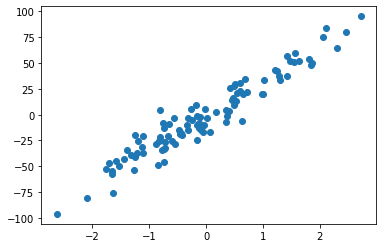

In [10]:
x, y = make_regression(n_samples=100, n_features=1, noise=10)
plt.scatter (x, y)

In [11]:
print(x.shape)
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 1)
(100, 1)


In [12]:
x1 = np.hstack((x, np.ones(x.shape)))
print(x1.shape)

(100, 2)


In [13]:
t = np.random.randn(2, 1)
print(t)

[[ 1.25798277]
 [-1.26717499]]


In [14]:
def curve1 (x1, t):
    return x1.dot(t)

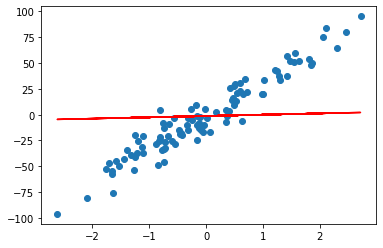

In [26]:
plt.scatter(x, y)
plt.plot(x, curve1(x1, t), c = 'r')

In [31]:
def cost(x1, y, t):
    m = len(y)
    return 1/(2*m)*np.sum((curve1(x1, t)-y)**2)

In [32]:
cost(x1, y, t)

649.0847954155298

In [44]:
def gradient(x1, y, t):
    m = len(y)
    return 1/m * x1.T.dot(curve1(x1, t) - y)

In [49]:
def descent(x1, y, t, a, iterations):
    cost_history = np.zeros(iterations)
    for i in range(0, iterations):
        t = t - a*gradient(x1, y, t)
        cost_history[i] = cost(x1, y, t)
    return t, cost_history

In [67]:
a = 0.01
iterations = 400

t_training, cost_history = descent(x1, y, t, a, iterations)

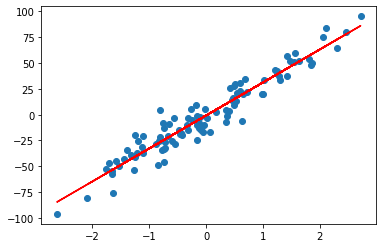

In [68]:
vector_predictions = curve1(x1, t_training)

plt.scatter(x, y)
plt.plot(x, vector_predictions, c='r')

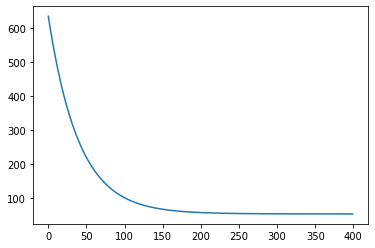

In [69]:
plt.plot(range(iterations), cost_history)

In [71]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [72]:
coef_determination(y, vector_predictions)

0.9226727552223258

In [1]:
print("o")

o
